# PRJ745177 - Swift et al.

Article link: [https://linkinghub.elsevier.com/retrieve/pii/S0048969721047665](https://linkinghub.elsevier.com/retrieve/pii/S0048969721047665).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(here("data/processed/PRJNA745177_processed.csv.gz"))
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,1001,+1002.A,ins:1002:1,0.09079445,793,72,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714
2,1026,+1027.T,ins:1027:1,0.06542056,749,49,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714
3,10871,+10872.A,ins:10872:1,0.00000000,1,0,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714
4,11095,+11096.T,ins:11096:1,0.11335013,397,45,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714
5,11521,+11522.T,ins:11522:1,0.08816121,397,35,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714
6,12196,+12197.A,ins:12197:1,0.09697733,794,77,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714


In [3]:
lineages_in_paper <- c(
    "B.1.160", "B.1.177", "B.1.221",
    "Alpha" = "B.1.1.7", "Beta" = "B.1.351", "Gamma" = "P.1",
    "Delta" = "B.1.617.2", "Lambda" = "C.37", "Mu" = "B.1.621"
)
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]   9 125

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
  1.811   0.019   1.850 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,5.085087e-02,NA,NA,B.1.621,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714
2,3.298580e-09,NA,NA,B.1.1.7,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714
3,8.433035e-04,NA,NA,P.1,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714
4,1.578644e-03,NA,NA,C.37,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714
5,3.224244e-01,NA,NA,B.1.351,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714
6,1.787249e-01,NA,NA,B.1.617.2,SRR15090099,2021-01-06,Columbia_01-06-21,507,15520312,PRJNA745177,Columbia,363714


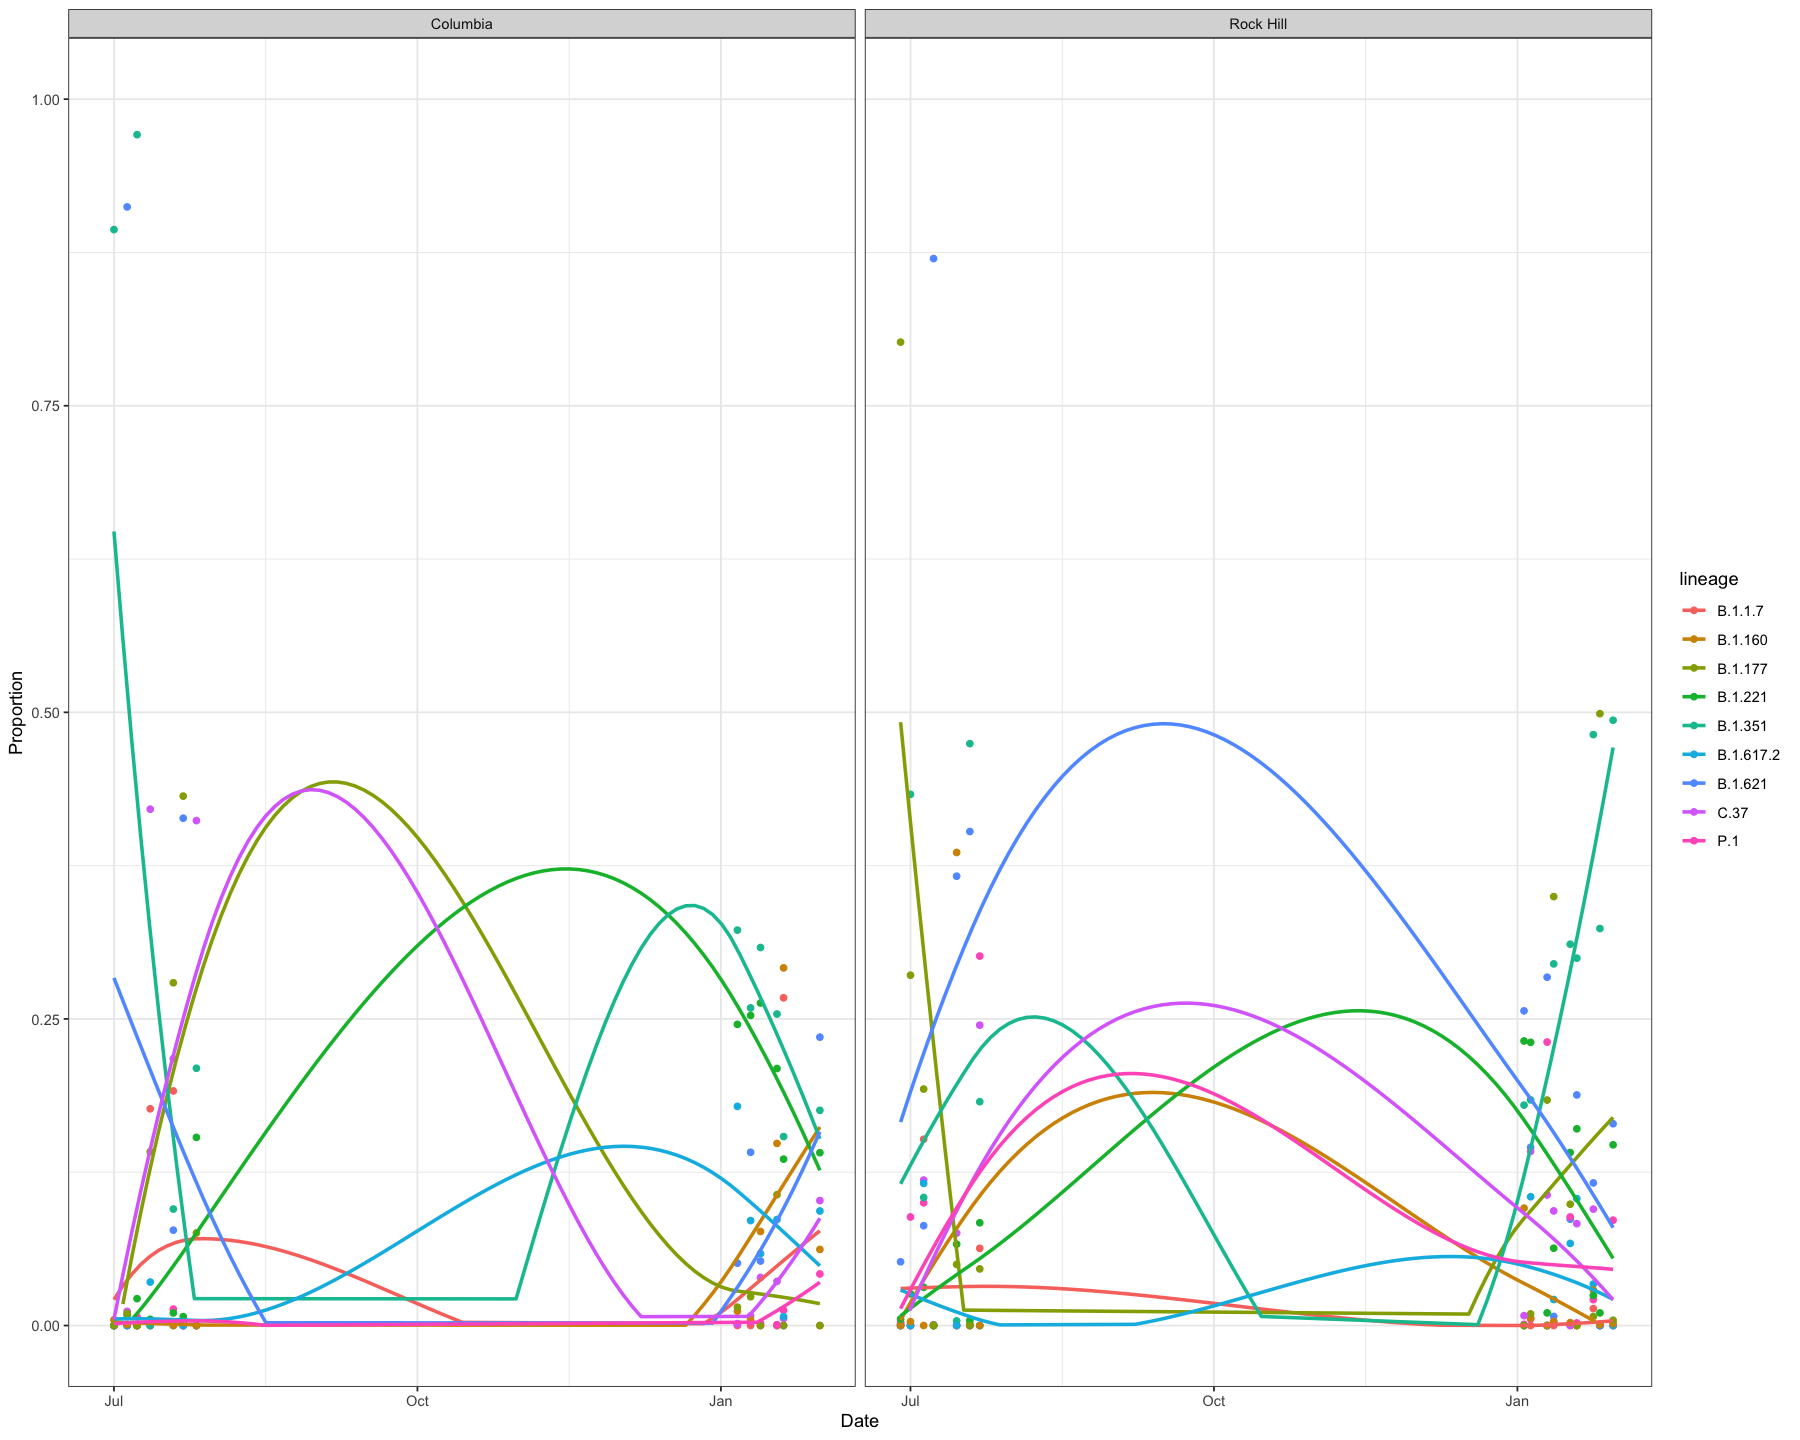

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

# One date failed to parse and looks like it's from 1900s (but no estimate)
res <- res[res$date > ymd("2020-01-01"), ]

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
